In [1]:
%autosave 0

Autosave disabled


In [75]:
#Import Packages

import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import interp
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import validation_curve
from numpy import random
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier

In [254]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [4]:
def printcfm(y_test,y_pred,title='confusion matrix'):
    cnf_matrix = confusion_matrix(y_test, y_pred)
    np.set_printoptions(precision=2)
    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=['Sem Perda','Perda'],
                      title=title)

In [5]:
def plotRoc(y_real, y_pred_prob):
    # Generate ROC curve values: fpr, tpr, thresholds
    fpr, tpr, thresholds = roc_curve(y_real, y_pred_prob)
    
    # Calculate AUC
    auc = roc_auc_score(y_real, y_pred_prob)

    # Plot ROC curve
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr)
    plt.text(1, 0.5, "AUC: %3.3f" % (auc), {'color': 'C2', 'fontsize': 18}, va="center", ha="right")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()

In [6]:
#Setando configurações de visualização
pd.options.display.max_rows=350
pd.options.display.max_columns=60

In [7]:
# df=pd.read_csv('baseProjeto_over.csv', index_col=0)
# df

#df.columns

# X=df[['ATRIB_MAX1',
#        'ATRIB_DIST1', 'DIFP', 'MGP1', 'MGP2', 'MGP3', 'MGP4', 'MGP5', 'MGP6',
#        'MGP7', 'MGP8', 'MGP9', 'MGP10', 'MGP11', 'MGP12', 'MGP13', 'MGP14']]

# X.head()

# X.info()

# #cat=['MGP1_sim', 'MGP2_sim', 'MGP3_sim', 'MGP4_sim',
#        'MGP5_sim', 'MGP6_sim', 'MGP7_sim', 'MGP8_sim', 'MGP9_sim', 'MGP10_sim',
#        'MGP11_sim', 'MGP12_sim', 'MGP13_sim', 'MGP14_sim',]
# #X[cat] = X[cat].astype('category')

# X.info()

# y = df['Perda30']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42, stratify=y)

#sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
#for train_index, test_index in sss.split(X, y):
#    print("TRAIN:", train_index, "TEST:", test_index)
#    X_train, X_test = X[train_index], X[test_index]
#    #y_train, y_test = y[train_index], y[test_index]



In [8]:
# train=pd.read_csv('baseProjetoTrainOver.csv', index_col=0)
# test=pd.read_csv('baseProjetoTest.csv', index_col=0)

In [9]:
# train=pd.read_csv('baseProjetoTrainOverFase1.csv', index_col=0)
# test=pd.read_csv('baseProjetoTestFase1.csv', index_col=0)
dfFase1=pd.read_csv('baseProjeto_entradaModelo_fase1.csv', index_col=0)

In [10]:
X_train = dfFase1[['ATRIB_MAX1',
        'ATRIB_DIST1', 'DIFP', 'MGP1', 'MGP2', 'MGP3', 'MGP4', 'MGP5', 'MGP6',
        'MGP7', 'MGP8', 'MGP9', 'MGP10', 'MGP11', 'MGP12', 'MGP13', 'MGP14']]

# X_test = dfFase1[['ATRIB_MAX1',
#         'ATRIB_DIST1', 'DIFP', 'MGP1', 'MGP2', 'MGP3', 'MGP4', 'MGP5', 'MGP6',
#         'MGP7', 'MGP8', 'MGP9', 'MGP10', 'MGP11', 'MGP12', 'MGP13', 'MGP14']]

y_train = dfFase1['Perda30']

# y_test = dfFase1['Perda30']

In [11]:
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

In [12]:
#y_test.value_counts().plot(kind='bar', title='Count (Perda30)');

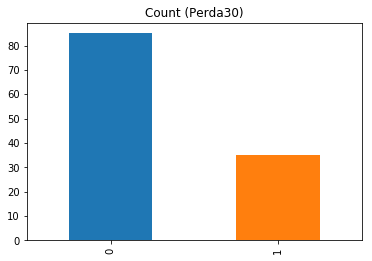

In [13]:
y_train.value_counts().plot(kind='bar', title='Count (Perda30)');

<br>
## Neural Network - Scaled with StandardScaller

In [14]:
steps = [('scaler', StandardScaler()),(('neural', MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(50, 32), random_state=42, max_iter=500, warm_start=True)))]
pipeline = Pipeline(steps)

hidden_layer_sizes=(n1, n2,..., nx) <br>
n1 = number of neurons in hidden layer_1 <br>
nx = number of neurons in hidden layer_x <br>

In [15]:
neural_scaled = pipeline.fit(X_train, y_train)

In [16]:
#for i in range(len(y_pred)):
#    print(y_pred_prob[i],y_pred[i])

In [17]:
# cv_scores = cross_val_score(pipeline, X, y, cv=5)

In [18]:
# print(cv_scores)

# print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))


<br>
## Neural Network - Scaled with MinMaxScaller

In [19]:
steps = [('scaler', MinMaxScaler()),(('neural', MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(50, 32), random_state=42, max_iter=1000, warm_start=True)))]
pipeline = Pipeline(steps)

hidden_layer_sizes=(n1, n2,..., nx) <br>
n1 = number of neurons in hidden layer_1 <br>
nx = number of neurons in hidden layer_x <br>

In [20]:
#neural_scaled = pipeline.fit(X_train, y_train)
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('neural', MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50, 32), learning_rate='constant',
       learning_rate_init=...
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=True))])

In [21]:
print(neural_scaled)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('neural', MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50, 32), learning_rate='constant',
       learning...
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=True))])


In [22]:
y_pred = pipeline.predict(X_train) 

In [23]:
accuracy_score(y_train, y_pred)

0.975

In [24]:
y_pred_prob = pipeline.predict_proba(X_train)[:,1]
y_scores = cross_val_predict(pipeline, X_train, y_train, cv=5, method='predict_proba' )
y_train_pred = cross_val_predict(pipeline, X_train, y_train, cv=5)
# hack to work around issue #9589 in Scikit-Learn 0.19.0
if y_scores.ndim == 2:
    y_scores = y_scores[:, 1]
# print(y_scores)
# print(np.mean(y_scores))

In [25]:
# for i in range(len(y_pred)):
#     print(y_pred_prob[i],y_pred[i], y_scores[i])

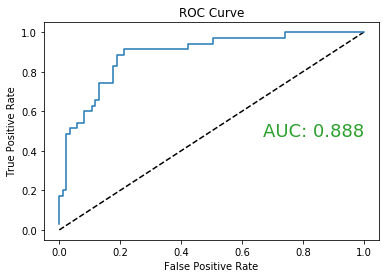

In [285]:
plotRoc(y_train, y_scores)

Confusion matrix, without normalization


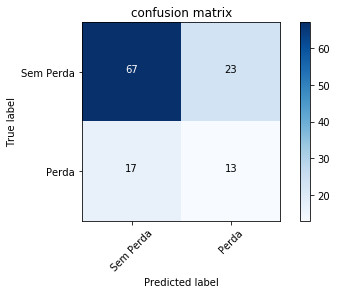

In [27]:
printcfm(y_train_pred, y_pred, title='confusion matrix')

In [28]:
print(classification_report(y_train_pred, y_pred))

             precision    recall  f1-score   support

          0       0.80      0.74      0.77        90
          1       0.36      0.43      0.39        30

avg / total       0.69      0.67      0.68       120



In [29]:
# cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5)
# print(cv_scores)

## Fine-tunning the model.

To turn on Fine-tunning: <br>
    define ft = 1

In [30]:
ft = 0

### 2 - Grid Search

In [31]:
if ft == 1 :
    rn = MLPClassifier(max_iter=1000, random_state=42)
    parameters = {'solver': ['lbfgs','adam','sgd'], 'alpha': 10.0 ** -np.arange(1, 7),
                 'hidden_layer_sizes': [x for x in itertools.product((5,10,20,30,60,100),repeat=3)]
                 }
    cv = GridSearchCV(rn, param_grid=parameters, verbose=3, n_jobs=-1)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.fit_transform(X_test)

    # rf.fit(X_train, y_train);
    cv.fit(X_train_scaled, y_train);

In [32]:
if ft == 1:
    print("Best params: ", cv.best_params_,) 
    print("Best Score: %3.3f" %(cv.best_score_))
    y_pred = cv.predict(X_train_scaled)
    final_model =cv.best_estimator_
    print(final_model)

### Best Model Result (11/2018) - 38 Wells

MLPClassifier(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(60, 10, 30), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

### Best Model Result (11/2018) - 89 Wells
MLPClassifier(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(30, 100, 5), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

### Best Model Result (09/2018) - 89 Wells
MLPClassifier(activation='relu', alpha=alpha, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 60), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

## Regularization of the best model

In [33]:
# alpha=1e-5

In [34]:
steps = [('scaler', StandardScaler()),(('neural', MLPClassifier(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50, 32), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)))]
pipeline = Pipeline(steps)

In [35]:
#neural_scaled = pipeline.fit(X_train, y_train)
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('neural', MLPClassifier(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50, 32), learning_rate='constant',
       learning...       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False))])

## Predicting the Classes in Trainning Set

In [36]:
y_train_pred = pipeline.predict(X_train) 
y_train_prob = pipeline.predict_proba(X_train)[:,1]

In [37]:
acc_train = accuracy_score(y_train, y_train_pred)
auc_train = roc_auc_score(y_train, y_train_pred)

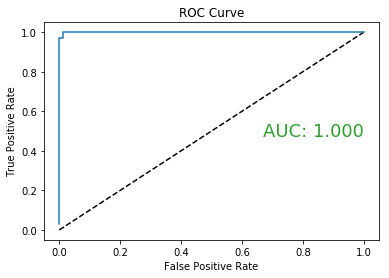

In [38]:
plotRoc(y_train, y_train_prob)

Confusion matrix, without normalization


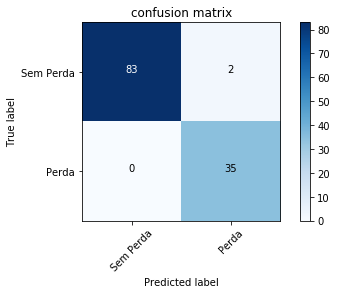

In [39]:
printcfm(y_train, y_train_pred, title='confusion matrix')

In [40]:
print(classification_report(y_train, y_train_pred))

             precision    recall  f1-score   support

          0       1.00      0.98      0.99        85
          1       0.95      1.00      0.97        35

avg / total       0.98      0.98      0.98       120



## Precision/Recall Tradeoff

In [41]:
#y_scores = cross_val_predict(pipeline, X_train, y_train, cv=3, method='predict_proba' )
# print(y_scores)
# print(np.mean(y_scores))

In [42]:
#y_pred_prob

In [43]:
# y_scores.shape

In [44]:
# # hack to work around issue #9589 in Scikit-Learn 0.19.0
# if y_scores.ndim == 2:
#     y_scores = y_scores[:, 1]

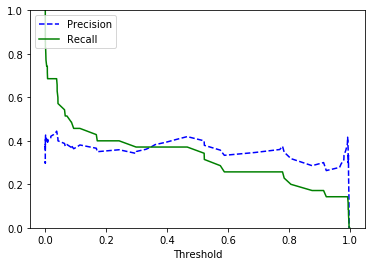

In [45]:
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [46]:
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=3)
print(cv_scores)
print(np.mean(cv_scores))

[0.71 0.6  0.67]
0.6579945799457994


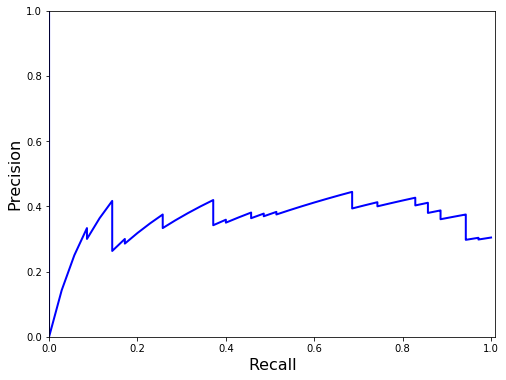

In [47]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1.01, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

In [48]:
# precisions, recalls, thresholds = precision_recall_curve(y_train, y_pred_prob)
# def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
#     plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
#     plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
#     plt.xlabel("Threshold")
#     plt.legend(loc="upper left")
#     plt.ylim([0, 1])
# plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
# plt.show()

## Varying the Threshold for train set

In [49]:
predict_mine = np.where(y_train_prob > 0.5, 1, 0)

In [50]:
y_train_pred_90 = (y_scores > .5)

In [51]:
precision = precision_score(y_train, y_train_pred_90)
recall = recall_score(y_train, y_train_pred_90)
print(precision, recall)

0.4 0.34285714285714286


Confusion matrix, without normalization


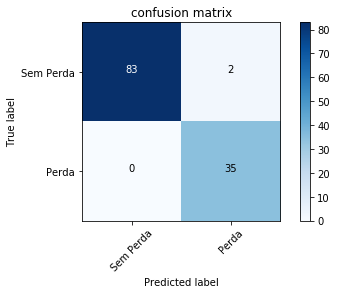

In [52]:
printcfm(y_train, predict_mine, title='confusion matrix')

In [53]:
print(classification_report(y_train, predict_mine))

             precision    recall  f1-score   support

          0       1.00      0.98      0.99        85
          1       0.95      1.00      0.97        35

avg / total       0.98      0.98      0.98       120



# Evaluating the model with Cross-Validation

In [54]:
y_pred_prob = pipeline.predict_proba(X_train)[:,1]

In [55]:
y_scores = cross_val_predict(pipeline, X_train, y_train, cv=5, verbose=3, method='predict_proba')

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.9s finished


In [56]:
y_train_pred = cross_val_predict(pipeline, X_train, y_train, cv=5, verbose=3)
# hack to work around issue #9589 in Scikit-Learn 0.19.0
if y_scores.ndim == 2:
    y_scores = y_scores[:, 1]
# print(y_scores)
# print(np.mean(y_scores))

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.0s finished


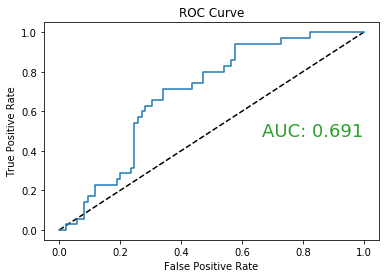

In [57]:
plotRoc(y_train, y_scores)

In [58]:
auc_train = roc_auc_score(y_train, y_train_pred)
auc_train

0.5621848739495798

Confusion matrix, without normalization


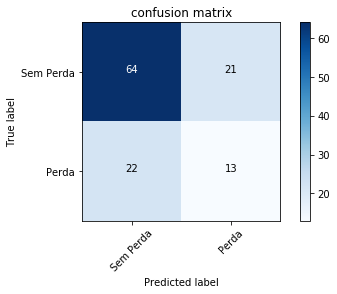

In [59]:
printcfm(y_train, y_train_pred, title='confusion matrix')

In [60]:
print(classification_report(y_train, y_train_pred))

             precision    recall  f1-score   support

          0       0.74      0.75      0.75        85
          1       0.38      0.37      0.38        35

avg / total       0.64      0.64      0.64       120



# Evaluating the model with LOO

In [61]:
loo = LeaveOneOut()
loo.get_n_splits(dfFase1)

120

In [62]:
for train, test in loo.split(dfFase1):
     print("%s %s" % (train, test))

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119] [0]
[  0   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119] [1]
[  0   1   3   4   5   6

In [63]:
cv=loo

In [64]:
y_pred_prob = pipeline.predict_proba(X_train)[:,1]

In [65]:
y_scores = cross_val_predict(pipeline, X_train, y_train, cv=cv, verbose=10, method='predict_proba', n_jobs=-1)

[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   18.6s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   20.9s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   23.8s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   26.6s finished


In [66]:
y_train_pred = cross_val_predict(pipeline, X_train, y_train, cv=cv, verbose=10)
# hack to work around issue #9589 in Scikit-Learn 0.19.0
if y_scores.ndim == 2:
    y_scores = y_scores[:, 1]
# print(y_scores)
# print(np.mean(y_scores))

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    2.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    3.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    3.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:   43.7s finished


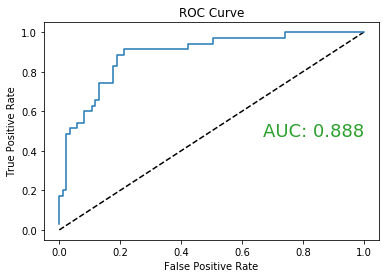

In [67]:
plotRoc(y_train, y_scores)

In [68]:
auc_train = roc_auc_score(y_train, y_scores)
auc_train

0.8884033613445379

Confusion matrix, without normalization


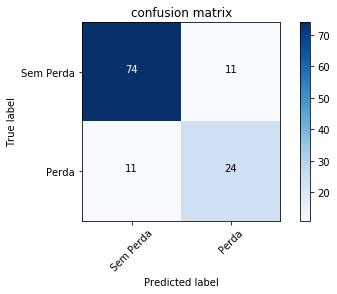

In [255]:
printcfm(y_train, y_train_pred, title='confusion matrix')

In [70]:
print(classification_report(y_train, y_train_pred))

             precision    recall  f1-score   support

          0       0.87      0.87      0.87        85
          1       0.69      0.69      0.69        35

avg / total       0.82      0.82      0.82       120



# Evaluating the model with Repeated K fold

In [286]:
def perform_repeated_cv(X, y , model):
    #set random seed for repeatability
    random.seed(1)

    #set the number of repetitions
    n_reps = 45

    # perform repeated cross validation
    accuracy_scores = np.zeros(n_reps)
    precision_scores=  np.zeros(n_reps)
    recall_scores =  np.zeros(n_reps)
    auc_scores =  np.zeros(n_reps)
    #result_pred = pd.DataFrame(index=np.arange(30))
    result_pred = y
    
    ##############################
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    fig = plt.figure(figsize=(20, 10))
    ###############################

    for u in range(n_reps):

        #randomly shuffle the dataset
        indices = np.arange(X.shape[0])
        np.random.shuffle(indices)
#         X = X[indices]
#         y = y[indices] #dataset has been randomly shuffled
        X = X.iloc[indices]
        y = y.iloc[indices] #dataset has been randomly shuffled

        #initialize vector to keep predictions from all folds of the cross-validation
        y_predicted = np.zeros(y.shape)
        probas = np.zeros(y.shape)

        #perform 10-fold cross validation
        kf = KFold(n_splits=4 , random_state=142)
        for train, test in kf.split(X):

            #split the dataset into training and testing
#             X_train = X[train]
#             X_test = X[test]
#             y_train = y[train]
#             y_test = y[test]
            X_train = X.iloc[train]
            X_test = X.iloc[test]
            y_train = y.iloc[train]
            y_test = y.iloc[test]

#             #standardization
#             scaler = preprocessing.StandardScaler().fit(X_train)
#             X_train = scaler.transform(X_train)
#             X_test = scaler.transform(X_test)

            #train model
            clf = model
            clf.fit(X_train, y_train)

            #make predictions on the testing set
            y_predicted[test] = clf.predict(X_test)
#            print(y_predicted[test],y_test,type(y_predicted))
            #y_train_pred_array = np.append(y_train_pred_array,y_train_pred)
#            print(result_pred)



            
            ###############################plot
#             probas_ = clf.predict_proba(X_test)
            probas[test] = clf.predict_proba(X_test)[:, 1]
#             print(probas[test], type(probas), probas.size)
         
#        print(y,y_predicted)
        #result_pred = y
        df_pred = pd.DataFrame(y_predicted, index=y.index,columns=[u])
        result_pred = pd.concat([result_pred, df_pred], axis=1) 
        

                
    
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(y, probas)
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        #roc_auc = auc(fpr, tpr) - Change to obtain AUC by predict proba
        roc_auc = roc_auc_score(y, y_predicted)
        aucs.append(roc_auc)
        plt.plot(fpr, tpr, lw=1, alpha=0.3,
        label='ROC fold %d (AUC = %0.2f)' % (u, roc_auc))

            
            ################################

        #record scores
        accuracy_scores[u] = accuracy_score(y, y_predicted)
        precision_scores[u] = precision_score(y, y_predicted)
        recall_scores[u]  = recall_score(y, y_predicted)
        auc_scores[u] = roc_auc_score(y, y_predicted)

    ###############################plot
    print(result_pred)
    
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
    label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
#     mean_auc = auc(mean_fpr, mean_tpr)
    mean_auc = np.mean(aucs)
    std_auc = np.std(aucs)
    plt.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)


    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    #plt.legend(loc="lower right")
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
               fancybox=True, shadow=True, ncol=5)
    plt.show()
    ################################
    
    #return all scores
    return accuracy_scores, precision_scores, recall_scores, auc_scores, result_pred

     Perda30    0    1    2    3    4    5    6    7    8    9   10   11   12  \
0          1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1          0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   
2          0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   
3          0  0.0  0.0  1.0  1.0  0.0  1.0  0.0  1.0  1.0  1.0  1.0  0.0  1.0   
4          1  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0   
5          1  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0   
6          1  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   
7          1  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   
8          1  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   
9          1  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   
10         0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
11         0  0.0  0.0  0.0 

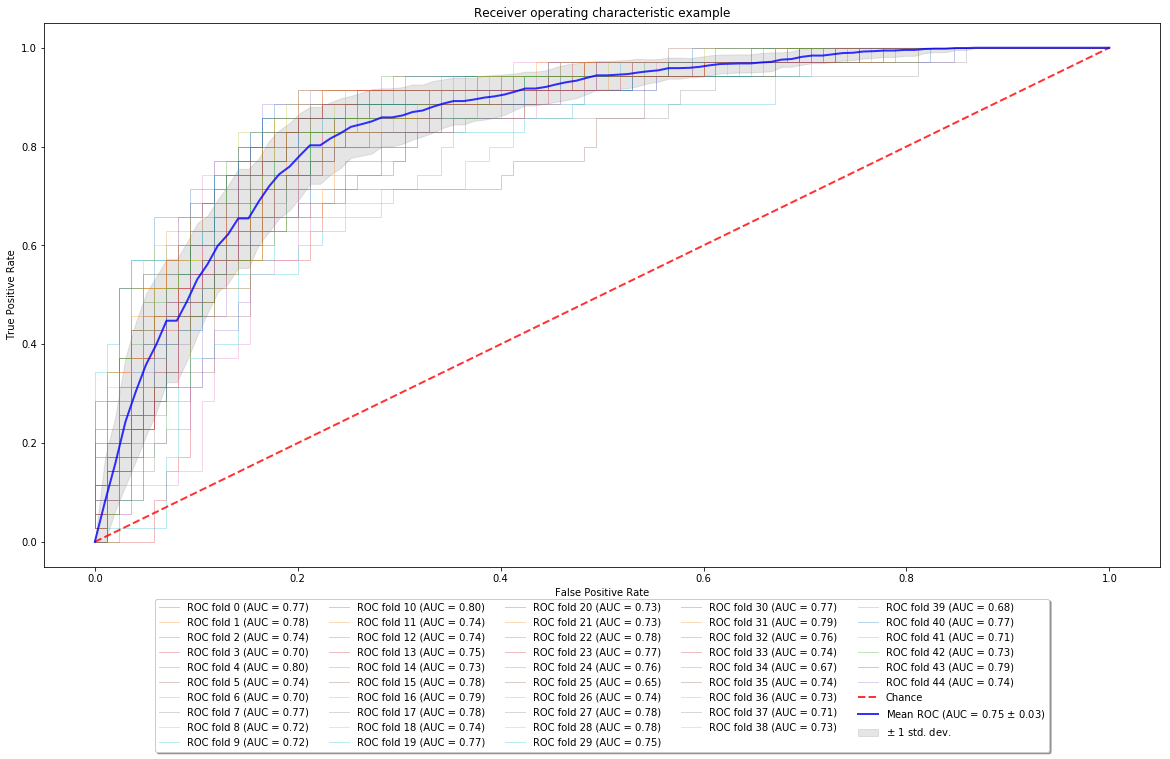

In [276]:
accuracy_scores, precision_scores, recall_scores, auc_scores, result_pred = perform_repeated_cv(X_train, y_train, pipeline)

In [277]:
print(accuracy_scores, accuracy_scores.size)

[0.82 0.82 0.79 0.78 0.82 0.78 0.75 0.82 0.77 0.78 0.83 0.8  0.79 0.78
 0.76 0.83 0.83 0.82 0.79 0.82 0.79 0.78 0.8  0.8  0.78 0.73 0.8  0.82
 0.82 0.77 0.81 0.81 0.81 0.79 0.74 0.79 0.78 0.78 0.77 0.75 0.82 0.77
 0.77 0.82 0.78] 45


In [278]:
print(precision_scores, recall_scores)

[0.73 0.71 0.65 0.64 0.68 0.61 0.57 0.7  0.6  0.62 0.71 0.68 0.66 0.62
 0.57 0.74 0.73 0.71 0.66 0.7  0.67 0.61 0.63 0.65 0.61 0.55 0.68 0.69
 0.71 0.58 0.67 0.65 0.68 0.65 0.57 0.65 0.64 0.63 0.59 0.58 0.7  0.61
 0.59 0.67 0.61] [0.63 0.69 0.63 0.51 0.74 0.66 0.57 0.66 0.6  0.6  0.71 0.6  0.6  0.66
 0.66 0.66 0.69 0.69 0.6  0.66 0.57 0.63 0.74 0.69 0.71 0.46 0.6  0.69
 0.69 0.71 0.69 0.74 0.66 0.63 0.49 0.63 0.6  0.54 0.63 0.51 0.66 0.57
 0.66 0.74 0.66]


In [279]:
print(auc_scores, auc_scores.size)

[0.77 0.78 0.74 0.7  0.8  0.74 0.7  0.77 0.72 0.72 0.8  0.74 0.74 0.75
 0.73 0.78 0.79 0.78 0.74 0.77 0.73 0.73 0.78 0.77 0.76 0.65 0.74 0.78
 0.78 0.75 0.77 0.79 0.76 0.74 0.67 0.74 0.73 0.71 0.73 0.68 0.77 0.71
 0.73 0.79 0.74] 45


No handles with labels found to put in legend.


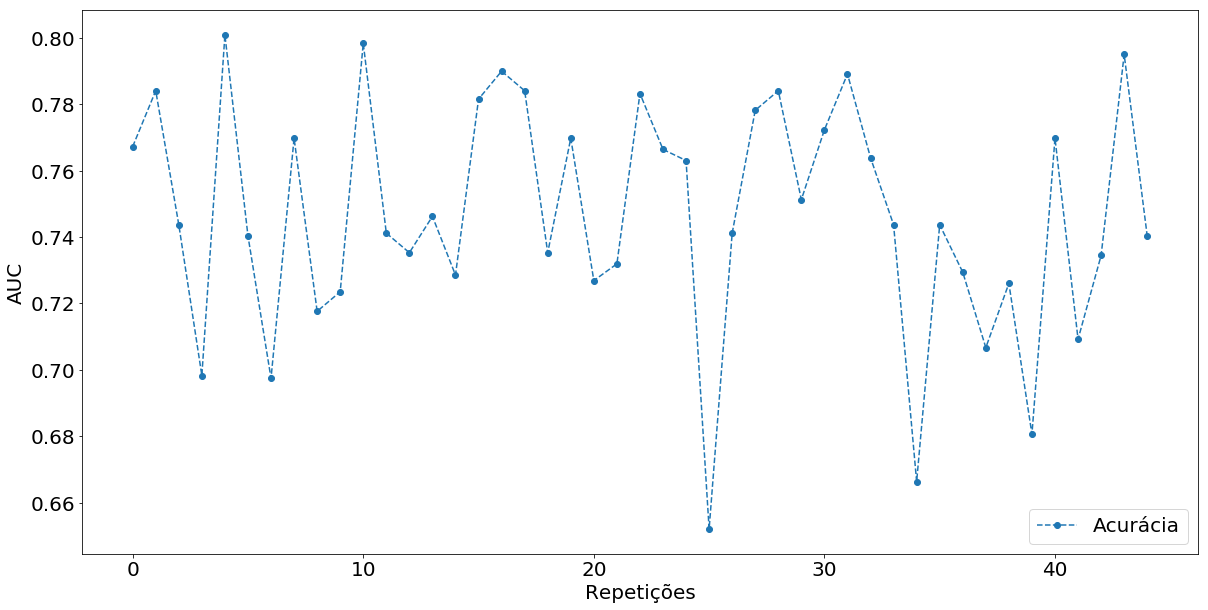

In [280]:
fig = plt.figure(figsize=(20, 10))
plt.plot(auc_scores, '--o')
plt.legend(loc='lower right')
plt.ylabel('AUC', fontsize=20);
plt.xlabel('Repetições', fontsize=20);
plt.tick_params(axis='both', which='major', labelsize=20);
plt.tick_params(axis='both', which='minor', labelsize=18);
#plt.xlim([0, 18])
#plt.ylim([0.5, 1])
plt.legend(('Acurácia', 'AUC'), loc='lower right', prop={'size': 20})
plt.show()

In [281]:
auc_scores.mean()

0.7467040149393092

In [282]:
auc_scores.std()

0.03466944816043158

In [283]:
print("Accuracy: %0.2f (+/- %0.2f)" % (np.mean(auc_scores), np.std(auc_scores)))

Accuracy: 0.75 (+/- 0.03)


In [284]:
result_pred.to_csv('result_kfold_MLP.csv', encoding='utf-8')

# Draft

In [ ]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

# #############################################################################
# Data IO and generation

# Import some data to play with
iris = datasets.load_iris()
# X = iris.data
# y = iris.target
X, y = X[y != 2], y[y != 2]
n_samples, n_features = X.shape

# Add noisy features
random_state = np.random.RandomState(0)
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# #############################################################################
# Classification and ROC analysis

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=6)
classifier = svm.SVC(kernel='linear', probability=True,
                     random_state=random_state)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
for train, test in cv.split(X, y):
    probas_ = classifier.fit(X[train], y[train]).predict_proba(X[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()